<a href="https://colab.research.google.com/github/darwinpadilla/Grupo_Productivity_Prediction/blob/main/Grupo_Productivity_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
print('Hola mundo')

Hola mundo


# Productivity Prediction of Garment Employees Data
Integrantes:
Rolando Diaz Gamboa \ 
Guillermo Dante Matos Cuba \ 
Darwin Padilla Gutierrez

In [90]:
# GM GIT. 1.1.-Librerías
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from matplotlib import pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
# 1.2.-Configuración general

# CONFIGURACIÓN Y SETEO DEL DATASET

In [91]:
#@title Informacion Dataset: garments_worker_productivity.csv
!wget -O garments_worker_productivity.csv https://archive.ics.uci.edu/ml/machine-learning-databases/00597/garments_worker_productivity.csv

--2021-06-28 16:10:08--  https://archive.ics.uci.edu/ml/machine-learning-databases/00597/garments_worker_productivity.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94933 (93K) [application/x-httpd-php]
Saving to: ‘garments_worker_productivity.csv’

garments_worker_pro 100%[===================>]  92.71K   473KB/s    in 0.2s    

2021-06-28 16:10:09 (473 KB/s) - ‘garments_worker_productivity.csv’ saved [94933/94933]



In [92]:
# RD GIT. 1.2 Configuración del DATASET y lectura inicial
# se lista contenido del directorio
%ls

garments_worker_productivity.csv  sample_data/


In [93]:
# RD GIT. 1.2 Configuración del DATASET y lectura inicial
#Lectura del dataset
file_name = "garments_worker_productivity.csv"

#El método "read_csv" nos permite leer un excel
dataset = pd.read_csv(file_name)

# PREPROCESAMIENTO

In [94]:
# RD GIT. 1.3 Análisis básico de datos
#mostrar tamaño del dataset y ver informacion del dataset
print("dimension del DATASET: ",dataset.shape)
dataset

dimension del DATASET:  (1197, 15)


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [95]:
# RD GIT. 1.3 Análisis básico de datos
#Las estadísticas descriptivas incluyen el  resumen la tendencia central, la dispersión y la forma de la distribución de un conjunto de datos, 
# excluyendo los valores NaN
dataset.describe

<bound method NDFrame.describe of            date   quarter  ... no_of_workers actual_productivity
0      1/1/2015  Quarter1  ...          59.0            0.940725
1      1/1/2015  Quarter1  ...           8.0            0.886500
2      1/1/2015  Quarter1  ...          30.5            0.800570
3      1/1/2015  Quarter1  ...          30.5            0.800570
4      1/1/2015  Quarter1  ...          56.0            0.800382
...         ...       ...  ...           ...                 ...
1192  3/11/2015  Quarter2  ...           8.0            0.628333
1193  3/11/2015  Quarter2  ...           8.0            0.625625
1194  3/11/2015  Quarter2  ...           8.0            0.625625
1195  3/11/2015  Quarter2  ...          15.0            0.505889
1196  3/11/2015  Quarter2  ...           6.0            0.394722

[1197 rows x 15 columns]>

In [96]:
# RD GIT. 1.3 Análisis básico de datos
#Revisar el dataset en funcion al tipo de datos de cada columna.
dataset.dtypes

date                      object
quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object

In [97]:
# RD GIT. 1.4 Tratamiento básico de columnas
#renombramos el nombre de la columna
dataset.rename(columns={'day': 'dia_semana'},  inplace=True)
dataset.rename(columns={'quarter': 'semana'},  inplace=True)
dataset.head()

,date,semana,department,dia_semana,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [98]:
# RD GIT. 1.4 Tratamiento básico de columnas
# VER EL TIPO DE DATO A CONVERTIR
dataset["date"] 

0        1/1/2015
1        1/1/2015
2        1/1/2015
3        1/1/2015
4        1/1/2015
          ...    
1192    3/11/2015
1193    3/11/2015
1194    3/11/2015
1195    3/11/2015
1196    3/11/2015
Name: date, Length: 1197, dtype: object

In [99]:
# RD GIT. 1.4 Tratamiento básico de columnas
# CONVERTIMOS LA VARIABLE A STRING
dataset["date"]  = dataset["date"].astype("string")

# CONVERTIRMOS LA VARIABLE A DATETIME
dataset["date"] =  pd.to_datetime(dataset["date"], format="%m/%d/%Y")

# CONVERTIRMOS LA VARIABLE AL FORMATO AÑO-MES-DIA
dataset["date"] =  pd.to_datetime(dataset["date"], format="%Y%m%d")

# VER EL TIPO DE DATO CONVERTIDO
dataset["date"] 

0      2015-01-01
1      2015-01-01
2      2015-01-01
3      2015-01-01
4      2015-01-01
          ...    
1192   2015-03-11
1193   2015-03-11
1194   2015-03-11
1195   2015-03-11
1196   2015-03-11
Name: date, Length: 1197, dtype: datetime64[ns]

In [100]:
# RD GIT. 1.4 Tratamiento básico de columnas
# CODIGO PARA SEPARAR LA FECHA
from datetime import datetime as dt

new_fecha=pd.to_datetime(dataset["date"], format="%Y%m%d")
dataset["anio"]=new_fecha.dt.strftime("%Y").astype(str).astype(int)
dataset["mes"]=new_fecha.dt.strftime("%m").astype(str).astype(int)
dataset["dia_mes"]=new_fecha.dt.strftime("%d").astype(str).astype(int)
dataset.head()


,date,semana,department,dia_semana,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,anio,mes,dia_mes
0,2015-01-01,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,2015,1,1
1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500,2015,1,1
2,2015-01-01,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,2015,1,1
3,2015-01-01,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,2015,1,1
4,2015-01-01,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,2015,1,1


In [101]:
# RD GIT. 1.4 Tratamiento básico de columnas
# CODIGO PARA ORDERNAR LAS COUMNAS AGREGADAS
for x in range(3):
  cols = dataset.columns.tolist()
  cols = cols[-1:] + cols[:-1]
  dataset = dataset[cols]
dataset.head()

,anio,mes,dia_mes,date,semana,department,dia_semana,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,2015,1,1,2015-01-01,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,2015,1,1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,2015,1,1,2015-01-01,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,2015,1,1,2015-01-01,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,2015,1,1,2015-01-01,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [102]:
# RD GIT. 1.4 Tratamiento básico de columnas
# se procede a eliminar la columna date (ya que se trató la información anteriormente) y la columna anio (es un valor único que no aporta valor)
dataset.drop(["anio","date"], axis=1, inplace = True)
dataset.dtypes

mes                        int64
dia_mes                    int64
semana                    object
department                object
dia_semana                object
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object

In [103]:
# RD GIT. 1.4 Tratamiento básico de columnas
# Cantidad de filas (registros) únicas por cada columna (variable)
dataset.nunique()

mes                        3
dia_mes                   30
semana                     5
department                 3
dia_semana                 6
team                      12
targeted_productivity      9
smv                       70
wip                      548
over_time                143
incentive                 48
idle_time                 12
idle_men                  10
no_of_style_change         3
no_of_workers             61
actual_productivity      879
dtype: int64

In [104]:
# RD GIT. 1.4 Tratamiento básico de columnas
# Se valida que la columna department cuenta 3 categorias pero solo se visualiza 2
# se procede a corregir

dataset["department"] = dataset["department"].str.rstrip()

In [105]:
# DP GIT. 1.5 Tratamiento de nulos y duplicados
#Porcentaje de filas (registros) únicas por cada columna (variable). Mientras más cercano el valor a 1 significa que tiene más filas (registros) únicos
dataset.nunique() / len(dataset)

mes                      0.002506
dia_mes                  0.025063
semana                   0.004177
department               0.001671
dia_semana               0.005013
team                     0.010025
targeted_productivity    0.007519
smv                      0.058480
wip                      0.457811
over_time                0.119465
incentive                0.040100
idle_time                0.010025
idle_men                 0.008354
no_of_style_change       0.002506
no_of_workers            0.050961
actual_productivity      0.734336
dtype: float64

In [106]:
# DP GIT. 1.5 Tratamiento de nulos y duplicados
#Visualizamos si las filas (registros) tienen nulos o no. El valor "True" indica que es nulo y "False" que no lo es
dataset.isna()

,mes,dia_mes,semana,department,dia_semana,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1193,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1194,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1195,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [107]:
# DP GIT. 1.5 Tratamiento de nulos y duplicados
#Cantidad de filas (registros) vacías por cada columna (variable)
dataset.isna().sum()

mes                        0
dia_mes                    0
semana                     0
department                 0
dia_semana                 0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [108]:
# DP GIT. 1.5 Tratamiento de nulos y duplicados
#Porcentaje de filas (registros) vacías por cada columna (variable). Cuanto más cercano el valor a 1 significa que tiene más filas (registros) vacías
dataset.isna().sum() / len(dataset)

mes                      0.000000
dia_mes                  0.000000
semana                   0.000000
department               0.000000
dia_semana               0.000000
team                     0.000000
targeted_productivity    0.000000
smv                      0.000000
wip                      0.422723
over_time                0.000000
incentive                0.000000
idle_time                0.000000
idle_men                 0.000000
no_of_style_change       0.000000
no_of_workers            0.000000
actual_productivity      0.000000
dtype: float64

In [109]:
# DP GIT. 1.5 Tratamiento de nulos y duplicados
#Obtenemos si las filas (registros) cumplen o no con la condición de tener nulos en la columna (variable) "Embarked"
criteria = dataset.wip.isna()

criteria

0       False
1        True
2       False
3       False
4       False
        ...  
1192     True
1193     True
1194     True
1195     True
1196     True
Name: wip, Length: 1197, dtype: bool

In [110]:
# DP GIT. 1.5 Tratamiento de nulos y duplicados
#Visualizamos las filas (registros) que cumplan con la condición de tener nulos en la columna (variable) "Embarked"
dataset[criteria]

,mes,dia_mes,semana,department,dia_semana,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1,1,1,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
6,1,1,Quarter1,finishing,Thursday,2,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.755167
13,1,1,Quarter1,finishing,Thursday,10,0.65,3.94,NaN,960,0,0.0,0,0,8.0,0.705917
14,1,1,Quarter1,finishing,Thursday,8,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.676667
15,1,1,Quarter1,finishing,Thursday,4,0.75,3.94,NaN,2160,0,0.0,0,0,18.0,0.593056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3,11,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3,11,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3,11,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3,11,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [111]:
# DP GIT. 1.5 Tratamiento de nulos y duplicados
#Revisamos cuantas filas (registros) y columnas (variables) tiene el dataset antes  de eliminar los duplicados
dataset.shape

(1197, 16)

In [112]:
# DP GIT. 1.5 Tratamiento de nulos y duplicados
#Al aplicar "drop_duplicates" obtenemos un nuevo "DataFrame", pero con el parámetro inplace igual a "True" podemos realizar dicha operación de
#eliminación y sobre-escribir el "DataFrame" del cual estamos eliminando con el nuevo "DataFrame" obtenido
dataset.drop_duplicates(keep="first", inplace=True)

In [113]:
# DP GIT. 1.5 Tratamiento de nulos y duplicados
#Revisamos cuantas filas (registros) y columnas (variables) tiene el dataset después de eliminar los duplicados
dataset.shape

(1197, 16)

In [114]:
# DP GIT. 1.5 Tratamiento de nulos y duplicados
#Revisamos la cantidad de filas (registros) vacías por cada columna (variable) después de eliminar los duplicados para verificar que si se llegaron a eliminar nulos
dataset.isna().sum()

mes                        0
dia_mes                    0
semana                     0
department                 0
dia_semana                 0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [115]:
# DP GIT. 1.6 Conversion de variables categóricas
#Determinamos que columnas (variables) son del tipo númerico y cuales son categóricas para poder usar esta información más adelante:
numeric_columns = list()
categorical_columns = list()
dictionary_of_columns_with_index_to_categorical = dict()
dictionary_of_columns_with_categorical_to_index = dict()

for column in dataset:
  #Determinamos si la columna (variable) es numérica o no
  if pd.api.types.is_numeric_dtype(dataset[column]):
    numeric_columns.append(column)
  else:
    #Modificamos el tipo de dato de la columna (variable) mediante "astype"
    dataset[column] = dataset[column].astype("category")

    #Verificamos si el tipo de dato de la columna (variable) fue transformado a categórico correctamente
    if not pd.api.types.is_categorical_dtype(dataset[column]):
      raise Exception("La columna {} no se transformó correctamente a categórica".format(column))

    dictionary_of_columns_with_index_to_categorical[column] = dict()
    dictionary_of_columns_with_categorical_to_index[column] = dict()
    
    #Indexamos los valores (categorías), sin tomar en consideración los nulos, de la columna (variable) y guardamos esa información en los diccionarios
    for index, category in enumerate(dataset[column].cat.categories):
      dictionary_of_columns_with_index_to_categorical[column][index] = category
      dictionary_of_columns_with_categorical_to_index[column][category] = index
    
    categorical_columns.append(column)

In [116]:
# DP GIT. 1.6 Conversion de variables categóricas
# impresion de variables almacenadas para el tratamiento
print(numeric_columns)
print(categorical_columns)
print(dictionary_of_columns_with_index_to_categorical.keys())
print(dictionary_of_columns_with_index_to_categorical)
#Vemos los índices que tienen los valores (categorías) de la columna (variable) "dia_semana" para verificar que los nulos no están indexados
dictionary_of_columns_with_index_to_categorical["dia_semana"]

['mes', 'dia_mes', 'team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', 'actual_productivity']
['semana', 'department', 'dia_semana']
dict_keys(['semana', 'department', 'dia_semana'])
{'semana': {0: 'Quarter1', 1: 'Quarter2', 2: 'Quarter3', 3: 'Quarter4', 4: 'Quarter5'}, 'department': {0: 'finishing', 1: 'sweing'}, 'dia_semana': {0: 'Monday', 1: 'Saturday', 2: 'Sunday', 3: 'Thursday', 4: 'Tuesday', 5: 'Wednesday'}}


{0: 'Monday',
 1: 'Saturday',
 2: 'Sunday',
 3: 'Thursday',
 4: 'Tuesday',
 5: 'Wednesday'}

In [117]:
# DP GIT. 1.6 Conversion de variables categóricas
#Visualizamos el tipo de dato de las columnas (variables) para validar que las no numéricas se transformaron a categóricas
dataset.dtypes

mes                         int64
dia_mes                     int64
semana                   category
department               category
dia_semana               category
team                        int64
targeted_productivity     float64
smv                       float64
wip                       float64
over_time                   int64
incentive                   int64
idle_time                 float64
idle_men                    int64
no_of_style_change          int64
no_of_workers             float64
actual_productivity       float64
dtype: object

In [118]:
# RD GIT. 1.7 tratamiento estadistico de datos incompletos
#Porcentaje de filas (registros) vacías por cada columna (variable) numérica
dataset[numeric_columns].isna().sum() / len(dataset)

mes                      0.000000
dia_mes                  0.000000
team                     0.000000
targeted_productivity    0.000000
smv                      0.000000
wip                      0.422723
over_time                0.000000
incentive                0.000000
idle_time                0.000000
idle_men                 0.000000
no_of_style_change       0.000000
no_of_workers            0.000000
actual_productivity      0.000000
dtype: float64

In [119]:
# RD GIT. 1.7 tratamiento estadistico de datos incompletos - adicional
# se extrae solo los registros que contienen datos nulos y se llena con un valor alto (99999) para realizar operaciones y analizar la info
dataset_wip_nulos=dataset[dataset.wip.isna()]
dataset_wip_nulos['wip']=99999
dataset_wip_nulos.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,mes,dia_mes,semana,department,dia_semana,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1,1,1,Quarter1,finishing,Thursday,1,0.75,3.94,99999,960,0,0.0,0,0,8.0,0.886500
6,1,1,Quarter1,finishing,Thursday,2,0.75,3.94,99999,960,0,0.0,0,0,8.0,0.755167
13,1,1,Quarter1,finishing,Thursday,10,0.65,3.94,99999,960,0,0.0,0,0,8.0,0.705917
14,1,1,Quarter1,finishing,Thursday,8,0.75,2.90,99999,960,0,0.0,0,0,8.0,0.676667
15,1,1,Quarter1,finishing,Thursday,4,0.75,3.94,99999,2160,0,0.0,0,0,18.0,0.593056


In [120]:
# RD GIT. 1.7 tratamiento estadistico de datos incompletos - adicional
# VERIFICAR DONDE SE ENCUENTRAN LOS NULOS, se va analizar en relacion al departamento ya que por teoria obeceden a procesos distintos
dataset_wip_nulos = dataset_wip_nulos.groupby(["department", "wip"]).agg({'wip':['count']})
dataset_wip_nulos.columns = ['Count']
dataset_wip_nulos = dataset_wip_nulos.reset_index()
dataset_wip_nulos

,department,wip,Count
0,finishing,99999,506
1,sweing,99999,0


In [121]:
# RD GIT. 1.7 tratamiento estadistico de datos incompletos - adicional
#Se puede observar que todos los datos incompletos pertenecen al departamento de finishing,
#y por teoria este departamento es el que se encarga de los acabados de las prendas por tanto su WIP es igual a CERO
dataset[numeric_columns] = dataset[numeric_columns].fillna(0)

In [122]:
# RD GIT. 1.7 tratamiento estadistico de datos incompletos
#Podemos reemplazar los nulos con la mediana en todo el dataset y sólo se reemplazarán las columnas (variables) numéricas. Sin embargo, por formalidad procederemos
#a reemplazar los nulos con la mediana sólo de aquellas columnas (variables) numéricas
#median_of_numeric_columns = dataset[numeric_columns].median()

#dataset[numeric_columns] = dataset[numeric_columns].fillna(median_of_numeric_columns)

In [123]:
# RD GIT. 1.7 tratamiento estadistico de datos incompletos
# validacion de que ya no existen variables con datos nulos
dataset[numeric_columns].isna().sum() / len(dataset)

mes                      0.0
dia_mes                  0.0
team                     0.0
targeted_productivity    0.0
smv                      0.0
wip                      0.0
over_time                0.0
incentive                0.0
idle_time                0.0
idle_men                 0.0
no_of_style_change       0.0
no_of_workers            0.0
actual_productivity      0.0
dtype: float64

In [124]:
# RD GIT. 1.6 Conversion de variables categóricas (se completa esta parte luego de tratar los nulos)
#Transformamos a números los valores (categorías) de las columnas (variables) categóricas sin considerar los nulos
dataset.replace(dictionary_of_columns_with_categorical_to_index, inplace=True)

dataset

,mes,dia_mes,semana,department,dia_semana,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1,1,0,1,3,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1,1,0,0,3,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500
2,1,1,0,1,3,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1,1,0,1,3,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1,1,0,1,3,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3,11,1,0,5,10,0.75,2.90,0.0,960,0,0.0,0,0,8.0,0.628333
1193,3,11,1,0,5,8,0.70,3.90,0.0,960,0,0.0,0,0,8.0,0.625625
1194,3,11,1,0,5,7,0.65,3.90,0.0,960,0,0.0,0,0,8.0,0.625625
1195,3,11,1,0,5,9,0.75,2.90,0.0,1800,0,0.0,0,0,15.0,0.505889


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


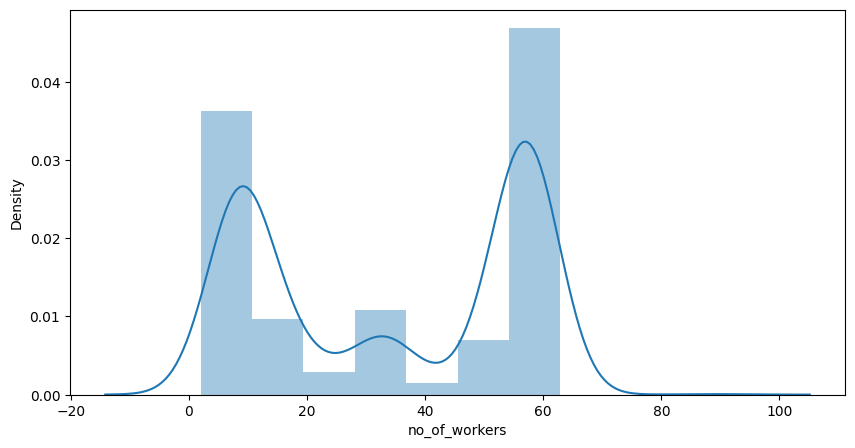

In [125]:
# RD GIT. 1.8 Análisis estadistico PARTE 1
# Se imprime una primera aproximación de la densidada de datos para el nro de trabajadores

width = 10
height = 5

plt.style.use("default")

plt.figure(figsize=(width, height))

sns.distplot(dataset['no_of_workers'], )

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

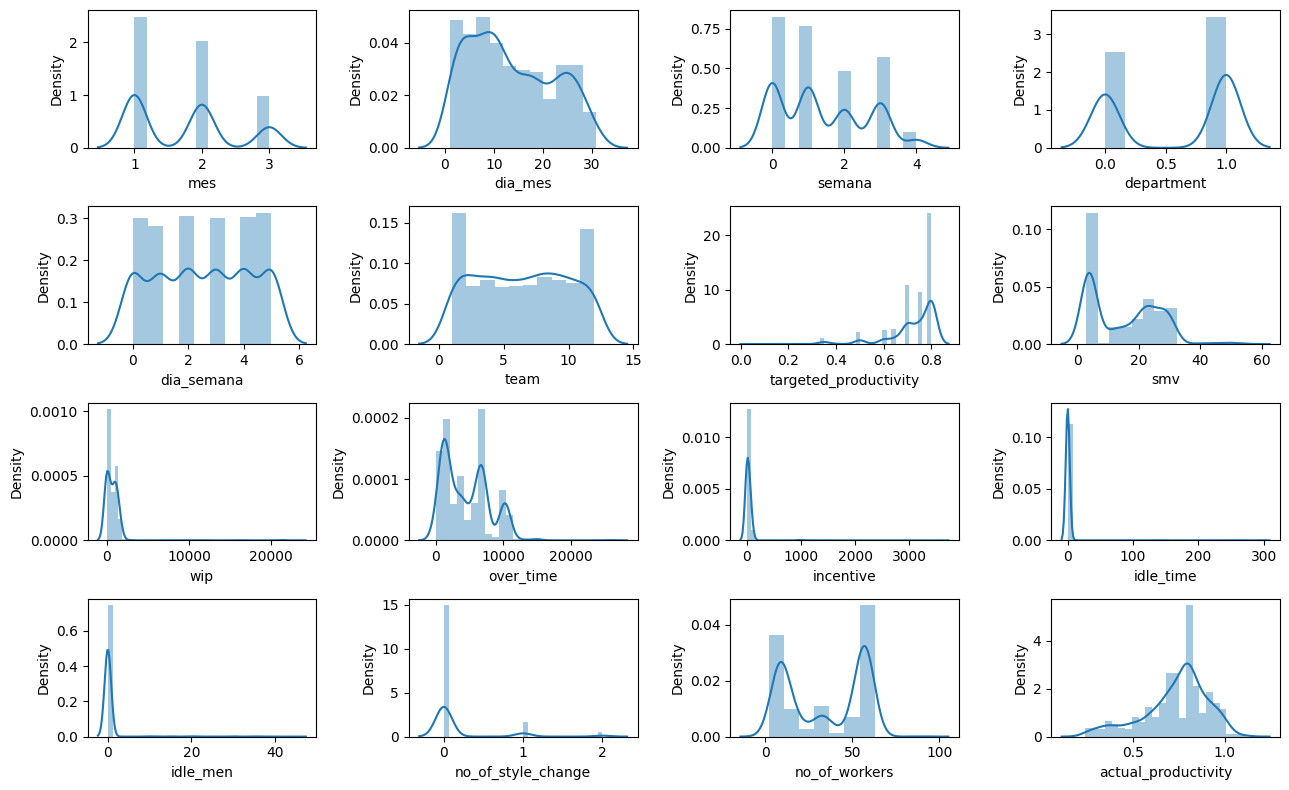

In [126]:
# RD GIT. 1.8 Análisis estadistico PARTE 1
# Se realiza un gráfico de densidad para todas las variables de forma individual

width = 13
height = 8

plt.style.use("default")

figure, axes = plt.subplots(nrows=4, ncols=4, figsize=(width, height))

for column, axe in zip(dataset, axes.flatten()):
    sns.distplot(dataset[column], ax=axe)
    
plt.tight_layout()

# ANALISIS DE LA DISPERSION DE LOS DATOS Y RELACIÓN DE VARIABLES

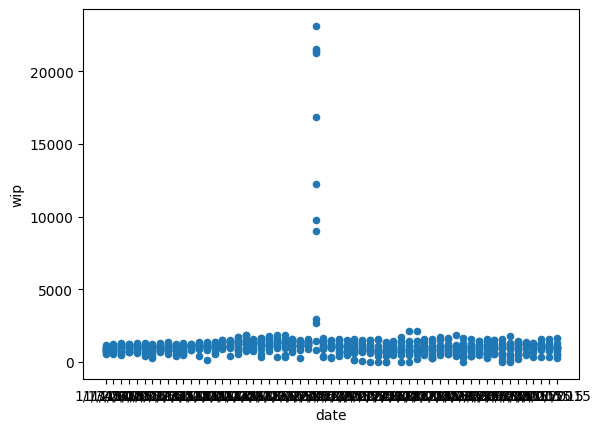

In [127]:
# DP GIT. 1.9 Análisis estadistico PARTE 2
# DP Explicación: Se aprecian los outlayers en el proceso WIP en el día 02 de febrero.
#DP. Ver la forma de dispersión de los datos de wip vs fechas y ver los datos extraños
datos = pd.read_csv("garments_worker_productivity.csv")
dfwip = datos[["date","wip"]]
dfwip.plot.scatter(x="date", y="wip", alpha=1)

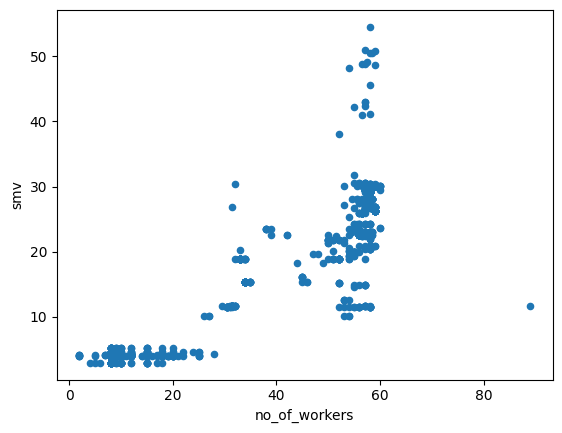

In [128]:
# DP GIT. 1.9 Análisis estadistico PARTE 2
# DP Analizamos la relación entre "número de trabajadores" vs "smv" 
# EXPLICACIÓN: Se nota un gran agrupamiento de datos para SMV menor a 10 y para numero de trabajadores menores a 20; 
# luego en numero cercano a 60 se tienen tiempos oscilantes, debido a los cuellos de botella del área de costura
datos = dataset
dfR1 = datos[["no_of_workers","smv"]]
dfR1.plot.scatter(x="no_of_workers", y="smv", alpha=1)

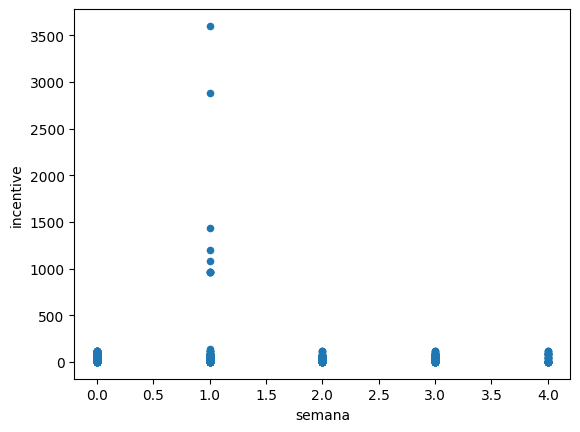

In [129]:
# DP GIT. 1.9 Análisis estadistico PARTE 2
# DP Analizamos la relación entre "incentivos" vs "semanas"  
# EXPLICACIÓN: Se nota la existencia de incentivos en la primera semana del mes a diferencia del resto, 
# indica que se tiene re procesos de la semana anterior que se deben corregir

datos = dataset
dfR4 = datos[["semana","incentive"]]
dfR4.plot.scatter(x="semana", y="incentive", alpha=1)

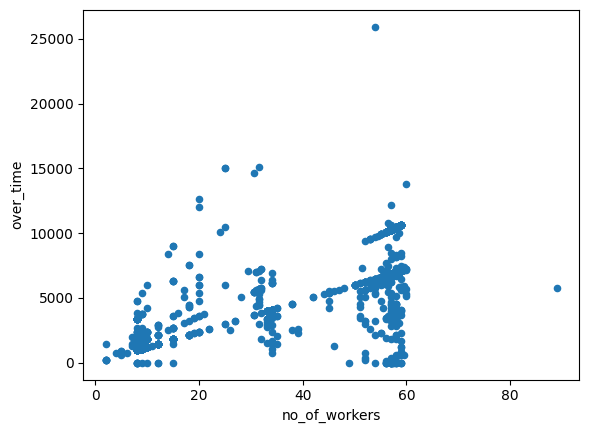

In [130]:
# DP GIT. 1.9 Análisis estadistico PARTE 2
# DP Analizamos la relación entre "no_of_workers" vs "over_time" EXPLICACIÓN: Se nota unas tendencias lineas en al menos dos grandes sectores
datos = dataset
dfR9 = datos[["no_of_workers","over_time"]]
dfR9.plot.scatter(x="no_of_workers", y="over_time", alpha=1)

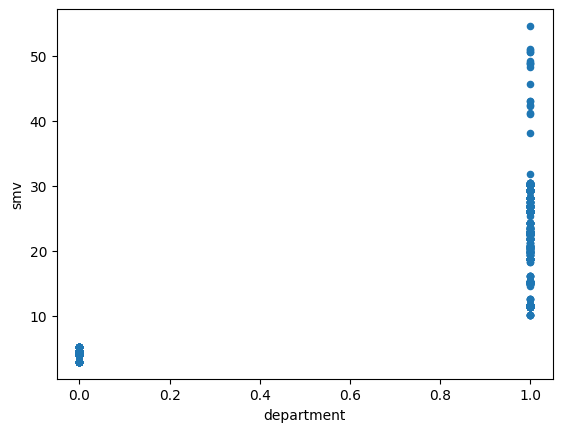

In [131]:
# DP GIT. 1.9 Análisis estadistico PARTE 2
# DP Analizamos la relación entre "department" vs "smv" 
# EXPLICACIÓN: Se nota un que el área de costura tienen tiempos grandes y pequeños de demoras, 
# lo cual muestra la presencia de cuellos de botella en el proceso que se pretende mejorar con metología LEAN

datos = dataset
dfR10 = datos[["department","smv"]]
dfR10.plot.scatter(x="department", y="smv", alpha=1)

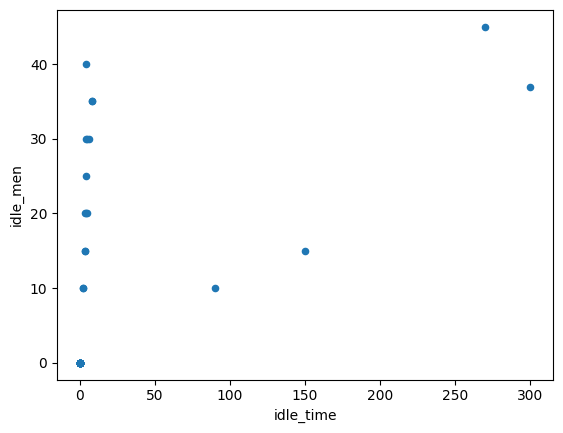

In [132]:
# DP GIT. 1.9 Análisis estadistico PARTE 2
# DP comparar los idle time e idle men 
# EXPLICACIÓN: Se nota una tendencia lineal entre ellos, lo cual es coherente bajo un modelo que busca aplicar metodo LEAN en la producción

datos = dataset
dfR13 = datos[["idle_time","idle_men"]]
dfR13.plot.scatter(x="idle_time", y="idle_men", alpha=1)

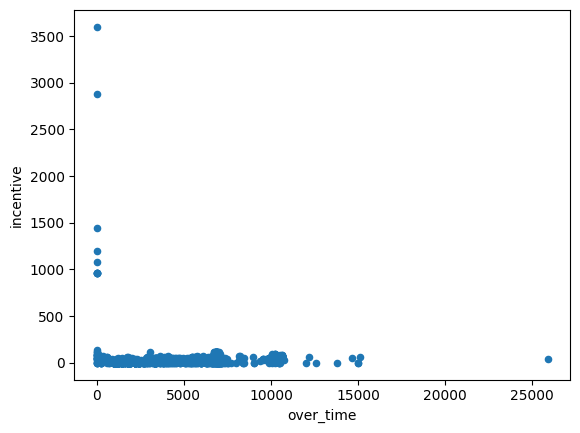

In [133]:
# DP GIT. 1.9 Análisis estadistico PARTE 2
# DP comparar overtime con incentivo 
# EXPLICACIÓN: Se nota un gran agrupamiento de datos por incentivos menores a 500 para el mayor número de datos

datos = dataset
dfR14 = datos[["over_time","incentive"]]
dfR14.plot.scatter(x="over_time", y="incentive", alpha=1)

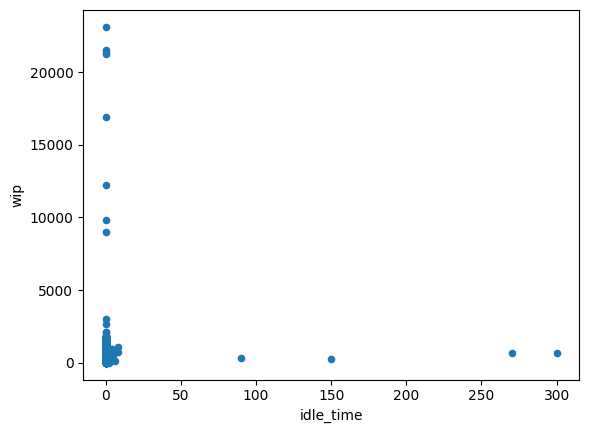

In [134]:
# DP GIT. 1.9 Análisis estadistico PARTE 2
# DP comparar idle_time con wip 
# EXPLICACIÓN: Se nota un gran agrupamiento de datos cerca del 0,0 lo cual daría una correlación fuerte
datos = dataset
dfR14 = datos[["idle_time","wip"]]
dfR14.plot.scatter(x="idle_time", y="wip", alpha=1)

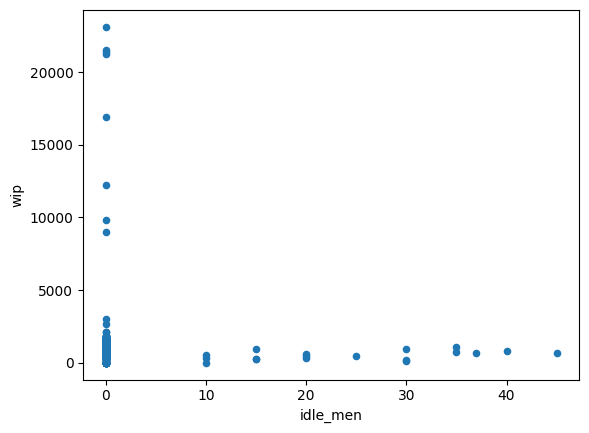

In [135]:
# DP GIT. 1.9 Análisis estadistico PARTE 2
# DP comparar idle_men con wip 
# EXPLICACIÓN: Se nota un gran agrupamiento de datos cerca del 0,0 lo cual daría una correlación fuerte
datos = dataset
dfR14 = datos[["idle_men","wip"]]
dfR14.plot.scatter(x="idle_men", y="wip", alpha=1)

In [136]:
# RD GIT. 1.10 Depuracion del ruido
# EXPLICACIÓN: Se Se analiza las variables que presentan un alto porcetanje de ceros y se verifica que presentan ruido a la predicción del Target

ruido_1 = dataset['idle_time'].value_counts(normalize=True) * 100
ruido_2 = dataset['idle_men'].value_counts(normalize=True) * 100
ruido_3 = dataset['no_of_style_change'].value_counts(normalize=True) * 100
print("---------------------------------------------------------------------");
print(" % de tiempo en que se interrumpió la producción debido a varias razones");
print("---------------------------------------------------------------------");
print(ruido_1);
print("---------------------------------------------------------------------");
print(" % trabajadores que estuvieron inactivos debido a la interrupción de la producción ");
print("---------------------------------------------------------------------");
print(ruido_2);
print("---------------------------------------------------------------------");
print(" % cambios en el estilo de un producto en particular            ");
print("---------------------------------------------------------------------");
print(ruido_3);


---------------------------------------------------------------------
 % de tiempo en que se interrumpió la producción debido a varias razones
---------------------------------------------------------------------
0.0      98.496241
3.5       0.250627
4.0       0.167084
4.5       0.167084
8.0       0.167084
5.0       0.167084
2.0       0.167084
270.0     0.083542
150.0     0.083542
6.5       0.083542
300.0     0.083542
90.0      0.083542
Name: idle_time, dtype: float64
---------------------------------------------------------------------
 % trabajadores que estuvieron inactivos debido a la interrupción de la producción 
---------------------------------------------------------------------
0     98.496241
30     0.250627
20     0.250627
15     0.250627
10     0.250627
35     0.167084
45     0.083542
40     0.083542
37     0.083542
25     0.083542
Name: idle_men, dtype: float64
---------------------------------------------------------------------
 % cambios en el estilo de un producto en 

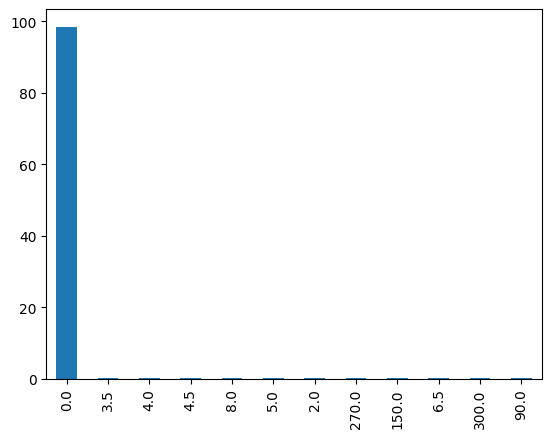

In [137]:
# RD GIT. 1.10 Depuracion del ruido
# Representación gráfica del ruido 1 - % de tiempo en que se interrumpió la producción debido a varias razones

ruido_1.plot(kind='bar',   fontsize=10)

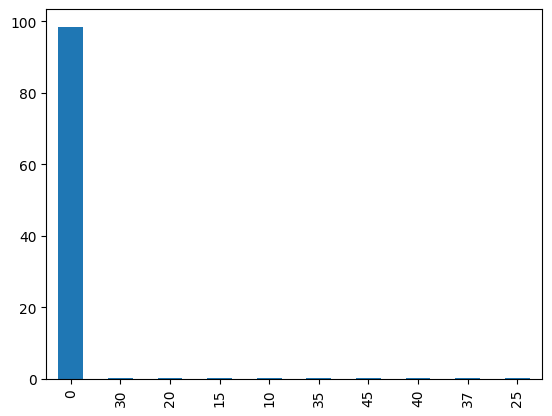

In [138]:
# RD GIT. 1.10 Depuracion del ruido -  % trabajadores que estuvieron inactivos debido a la interrupción de la producción 
# Representación gráfica del ruido 2

ruido_2.plot(kind='bar',   fontsize=10)

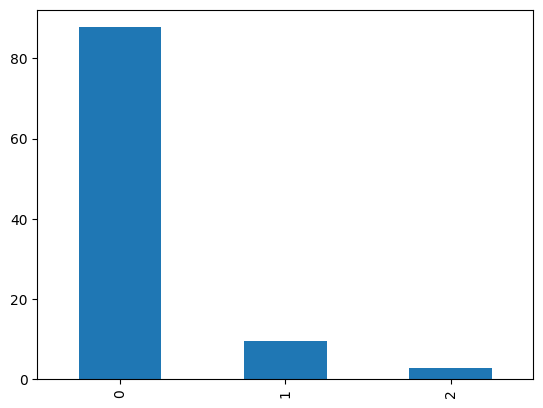

In [139]:
# RD GIT. 1.10 Depuracion del ruido
# Representación gráfica del ruido 3 - % cambios en el estilo de un producto en particular

ruido_3.plot(kind='bar',   fontsize=10)

In [140]:
# RD GIT. 1.10 Depuracion del ruido
# Luego de hacer el análisis del ruido se procede con la eliminación de las columnas
dataset.drop(["idle_time","idle_men","no_of_style_change"], axis=1, inplace = True)
dataset

,mes,dia_mes,semana,department,dia_semana,team,targeted_productivity,smv,wip,over_time,incentive,no_of_workers,actual_productivity
0,1,1,0,1,3,8,0.80,26.16,1108.0,7080,98,59.0,0.940725
1,1,1,0,0,3,1,0.75,3.94,0.0,960,0,8.0,0.886500
2,1,1,0,1,3,11,0.80,11.41,968.0,3660,50,30.5,0.800570
3,1,1,0,1,3,12,0.80,11.41,968.0,3660,50,30.5,0.800570
4,1,1,0,1,3,6,0.80,25.90,1170.0,1920,50,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3,11,1,0,5,10,0.75,2.90,0.0,960,0,8.0,0.628333
1193,3,11,1,0,5,8,0.70,3.90,0.0,960,0,8.0,0.625625
1194,3,11,1,0,5,7,0.65,3.90,0.0,960,0,8.0,0.625625
1195,3,11,1,0,5,9,0.75,2.90,0.0,1800,0,15.0,0.505889
